# AutoDiff

This automatic differentiation and optimization/root-finding Python module was created for the final project of CS207. Our group members are:
* Kay
* Henry
* Lipika Ramswamy
* Anthony Rentsch

Install the package on for yourself from [PyPI]() and see our Github repository for installation and basic usage instructions. 

This notebook is intended to be demonstrate the functionality of our module.

# Import

In [11]:
# import AutoDiff as ad
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

## TEMP
import sys 
sys.path.append("../src/source_code")
from ElementaryFunctions import ElementaryFunctions as ef
from AutoDiffObject_testingder2 import AutoDiff as ad

# Basic functionality

In [12]:
# instantiate an AutoDiffObject --> i.e. the variable that we will differentiate
x = ad(2, "x")

# create a function using that variable
# for most basic functions, use our ElementaryFunctions module
f = ef.sin(x)

# check the values
print('Value:', f.val, '\nFirst derivative:', f.der, '\nSecond derivative:', f.der2)

Value: 0.9092974268256817 
First derivative: {'x': -0.4161468365471424} 
Second derivative: {'x': -0.9092974268256817}


# Visual inspection of what's going on 

In [60]:
fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = ad(i, "x")
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])

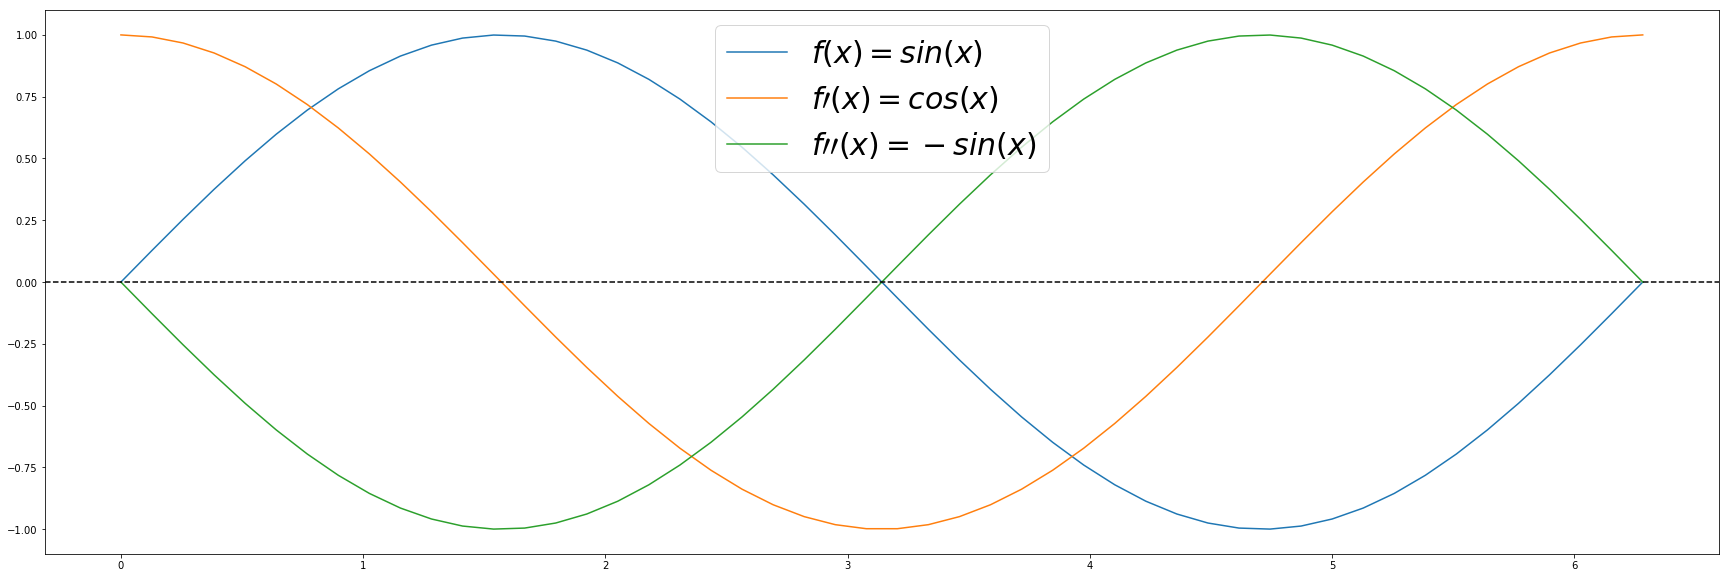

In [62]:
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=30)
plt.show()

# Optimization and root-finding